Draw some plots for display and first presentation.

- Word Frequency for single word.
- Word Cloud.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import ast

In [3]:
from nltk import FreqDist

In [4]:
df_review = pd.read_csv("Chinese_review.csv")

In [5]:
reviews_token = df_review["text_token"].tolist()  ## but each value in the list is a str(of a list)

In [6]:
reviews_token = [ast.literal_eval(review) for review in reviews_token]  ## conver the string to a list

In [7]:
reviews_token_flatten = [word for sublist in reviews_token for word in sublist]

In [8]:
freq_all = FreqDist(reviews_token_flatten)

In [9]:
## Ref: https://blog.csdn.net/m0_38126215/article/details/83582697

f = zip(freq_all.keys(),freq_all.values())  # dictionary to list
sort_f = list(sorted(f,key=lambda s: s[1], reverse=True))  # sort by number of frequency

In [10]:
## Top n words for all reviews

for i in range(10):  
    print(sort_f[i])

('not', 390756)
('food', 263804)
('good', 176039)
('place', 159718)
('chicken', 111335)
('like', 104497)
('service', 104436)
('chinese', 100551)
('great', 91294)
('restaurant', 84424)


**Word Cloud**

In [11]:
from wordcloud import WordCloud

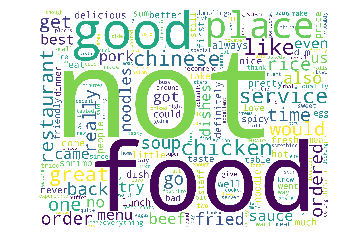

In [13]:
wordcloud = WordCloud(width=2000, height=1500, background_color='white').fit_words(freq_all)

plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("figure/All_WordCloud",dpi=500)
plt.show()

In [14]:
## Word frequency for each star

freq_star = list()

for rating in [1.0,2.0,3.0,4.0,5.0]:
    df_review_rating = df_review.loc[df_review['stars'] == rating]
    review_rating = df_review_rating["text_token"].values.tolist() ## each element is a string 
    review_rating = [ast.literal_eval(review) for review in review_rating]  ## conver the string to a list
   
    reviews_rating_flatten = [word for sublist in review_rating for word in sublist]
    freq_rating = FreqDist(reviews_rating_flatten)

    freq_star.append(freq_rating)

In [15]:
star_word_number = list()  ## The number of words for each star
for rating in [1.0,2.0,3.0,4.0,5.0]:
    df_review_rating = df_review.loc[df_review['stars'] == rating]
    star_word_number.append(df_review_rating["text_length"].sum())

Word cloud for star1

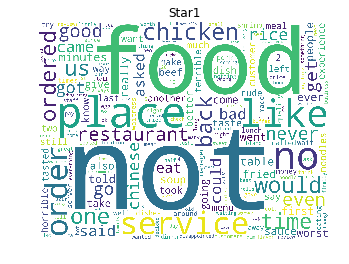

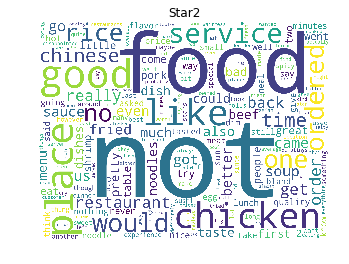

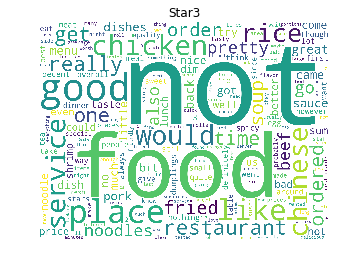

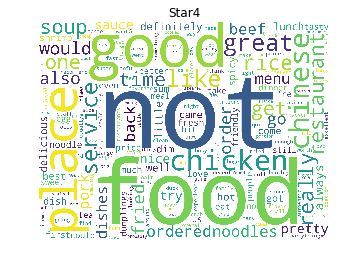

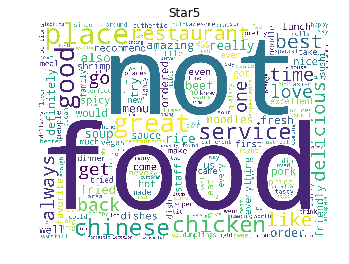

In [16]:
for i in range(5):
    
    wordcloud = WordCloud(width=2000, height=1500, background_color='white').fit_words(freq_star[i])  ## star = 1.0

    plt.imshow(wordcloud)
    plt.title("Star" + str(i+1))
    plt.axis("off")
    plt.savefig("Star" + str(i+1) + "WordCloud",dpi=500)
    plt.show()

In [17]:
## plot the histograme for specify word, using scale frequency
## devide the frequency using the number of words(filter the stop words), N = 15021577

def plot_hist(word, save = True):
    freq = list()
    for i in range(5):
        scale_freq = dict(freq_star[i])[word] / star_word_number[i]
        freq.append(scale_freq)
    plt.bar(range(5),freq, tick_label = ["1.0", "2.0", "3.0", "4.0", "5.0"])
    plt.xlabel("Stars")
    plt.ylabel("Freq")
    plt.title(word)
    if save:
        plt.savefig(word + ".png", dpi=500)
    plt.show()

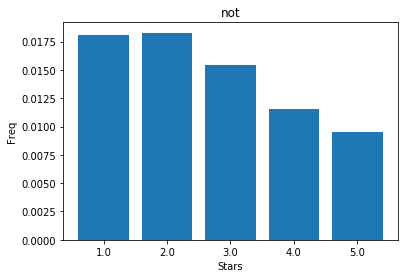

In [18]:
plot_hist("not")

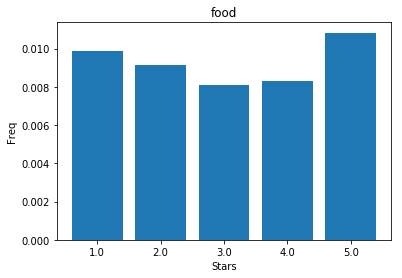

In [19]:
plot_hist("food")

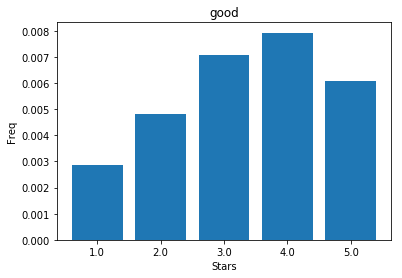

In [20]:
plot_hist("good")

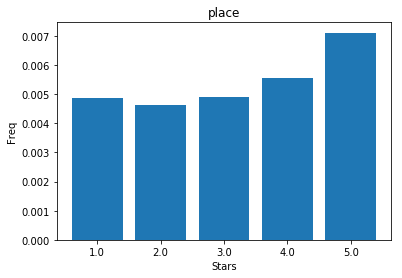

In [21]:
plot_hist("place")

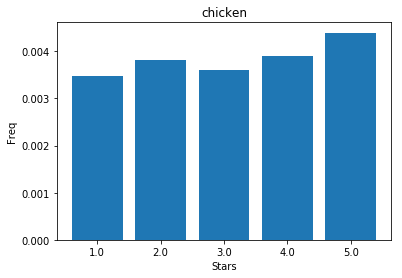

In [22]:
plot_hist("chicken")

In [23]:
def plot_hist_wordList(wordList, nRow, nCol, FileName, dpi = 500, save = True):
    count = 0
    for word in wordList:
        count += 1
        freq = list()
        for i in range(5):
            scale_freq = dict(freq_star[i])[word] / star_word_number[i]
            freq.append(scale_freq)
       ## plt.subplot(str(nRow) + str(nCol)+str(count))
        plt.subplot(nRow, nCol , count)
        plt.bar(range(5),freq, tick_label = ["1", "2", "3", "4", "5"])
#         plt.xlabel("Stars")
#         plt.ylabel("Freq")
        plt.title(word)
        
    plt.subplots_adjust(wspace = 1, hspace = 1)
    
    if save:
        plt.savefig(FileName, dpi=dpi)
        
    plt.close()

In [24]:
## About the food: chicken, beef, dumpling, noodles,soup,fried, dishes, pork, shrimp, spicy
## noodle, egg, sushi
food_list = ["chicken", "beef", "soup", "noodles","dumpling","pork", "shrimp", "egg", "fried", "spicy", "sushi", "fresh"]
plot_hist_wordList(food_list, 3,4,"figure/Food.png",dpi=1000)

In [25]:
## Abount the altitude: great, good, like, really, back, best, always, even ,pretty, 
## nice, well, delicious, little, love, better, never, fresh, friendly, bad, recommend

altitude_list = ["great", "good", "best", "nice", "delicious", "love", "recommend", "back", "never", "bad", "hate", "table"]
plot_hist_wordList(altitude_list, 3,4,"figure/Attitude.png",dpi=1000)

In [26]:
## Abount the service: place, time, service, menu, order, lunch, dinner, price, taste, wait, staff, quality

service_list = ["place","time", "service", "menu", "order", "lunch", "dinner", "price", "taste", "wait", "staff","quality"]
plot_hist_wordList(service_list, 3,4,"figure/Service.png",dpi=1000)

For top 100 words.

In [27]:
top_100 = [""] * 100
for i in range(100):  
    top_100[i] = sort_f[i][0]

In [28]:
plot_hist_wordList(top_100[0:10],2,5,"figure/Top10.png",dpi=1000)
plot_hist_wordList(top_100[10:20],2,5,"figure/Top20.png",dpi=1000)
plot_hist_wordList(top_100[20:30],2,5,"figure/Top30.png",dpi=1000)
plot_hist_wordList(top_100[30:40],2,5,"figure/Top40.png",dpi=1000)
plot_hist_wordList(top_100[40:50],2,5,"figure/Top50.png",dpi=1000)
plot_hist_wordList(top_100[50:60],2,5,"figure/Top60.png",dpi=1000)
plot_hist_wordList(top_100[60:70],2,5,"figure/Top70.png",dpi=1000)
plot_hist_wordList(top_100[70:80],2,5,"figure/Top80.png",dpi=1000)
plot_hist_wordList(top_100[80:90],2,5,"figure/Top90.png",dpi=1000)
plot_hist_wordList(top_100[90:100],2,5,"figure/Top100.png",dpi=1000)